# Prepare data

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

import gc

import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
    accuracy_score, 
    precision_score, 
    recall_score
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from lightgbm.sklearn import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

## load data

In [125]:
games = pd.read_csv('games.csv')
games_details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
teams = pd.read_csv('teams.csv')
ranking = pd.read_csv('ranking.csv')
games_formated = pd.read_csv('games17.csv')

In [126]:
gc.collect()

0

## Quick look

In [11]:
games.sample(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
3201,2019-12-03,21900304,Final,1610612743,1610612747,2019,1610612743,96.0,0.407,0.941,...,26.0,35.0,1610612747,105.0,0.464,0.667,0.292,24.0,56.0,0
11838,2008-03-05,20700902,Final,1610612749,1610612760,2007,1610612749,118.0,0.484,0.645,...,36.0,45.0,1610612760,106.0,0.465,0.742,0.375,19.0,45.0,1
15789,2005-04-19,20401215,Final,1610612742,1610612760,2004,1610612742,101.0,0.506,0.708,...,32.0,38.0,1610612760,96.0,0.452,0.769,0.476,14.0,41.0,1
23307,2016-03-11,21500964,Final,1610612755,1610612751,2015,1610612755,95.0,0.452,0.667,...,25.0,49.0,1610612751,89.0,0.379,0.818,0.294,22.0,41.0,1
23930,2015-12-12,21500348,Final,1610612741,1610612740,2015,1610612741,98.0,0.423,0.828,...,17.0,48.0,1610612740,94.0,0.449,0.727,0.375,26.0,41.0,1


In [12]:
games_details.sample(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
409645,21800575,1610612757,POR,Portland,203917,Nik Stauskas,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11936,22100549,1610612756,PHX,Phoenix,1630688,Ish Wainright,Ish,NaN,NaN,8:34,...,2.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,2.0,-5.0
531214,21500055,1610612748,MIA,Miami,2547,Chris Bosh,NaN,F,NaN,39:14,...,2.0,12.0,14.0,2.0,3.0,2.0,0.0,4.0,9.0,-5.0
12565,22100518,1610612746,LAC,LA,1628379,Luke Kennard,Luke,G,NaN,35:44,...,0.0,4.0,4.0,4.0,1.0,2.0,2.0,2.0,17.0,4.0
71444,21900814,1610612758,SAC,Sacramento,202357,Nemanja Bjelica,NaN,C,NaN,21:45,...,2.0,5.0,7.0,0.0,0.0,0.0,0.0,3.0,10.0,-17.0


In [13]:
players.sample(5)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
4002,Jameer Nelson,1610612742,2749,2014
6416,David West,1610612740,2561,2010
2300,Paul George,1610612754,202331,2016
7144,Jason Hart,1610612750,2078,2009
2879,Hassan Whiteside,1610612748,202355,2015


In [14]:
ranking.sample(2)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
164532,1610612748,0,22004,2005-04-17,East,Miami,80,57,23,0.713,34-6,23-17,NaN
3442,1610612739,0,22021,2021-11-18,East,Cleveland,17,9,8,0.529,4-4,5-4,NaN


In [15]:
teams.sample(2)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
23,0,1610612762,1974,2019,UTA,Jazz,1974,Utah,Vivint Smart Home Arena,20148.0,Greg Miller,Dennis Lindsey,Quin Snyder,Salt Lake City Stars
26,0,1610612765,1948,2019,DET,Pistons,1948,Detroit,Little Caesars Arena,21000.0,Tom Gores,Ed Stefanski,Dwane Casey,Grand Rapids Drive


### Season distribution

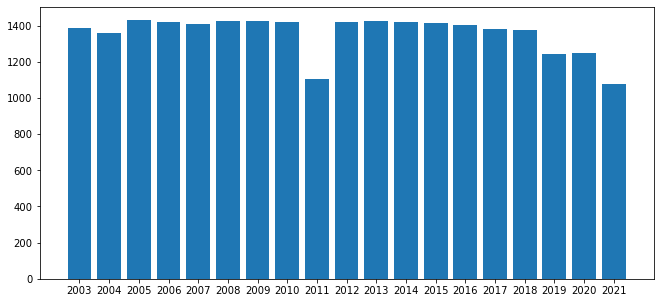

In [16]:
fig, ax = plt.subplots(figsize=(11,5))

v_c = games['SEASON'].value_counts().sort_index()
v_c.index = v_c.index.astype(str)
ax.bar(v_c.index, v_c.values)

plt.show()

The **2011–12 NBA** season was the 66th season of the National Basketball Association (NBA), which began with the signing of a new collective bargaining agreement (CBA) between the owners of the 30 NBA teams and the NBA's players. The previous CBA, which was ratified in 2005, expired at 12:01 AM EDT on July 1, 2011, resulting in a lockout. With the new deal in place, **the regular season was shortened** from the normal 82 games per team to 66, because of nearly two months of inactivity. 

Source : https://en.wikipedia.org/wiki/2011%E2%80%9312_NBA_season

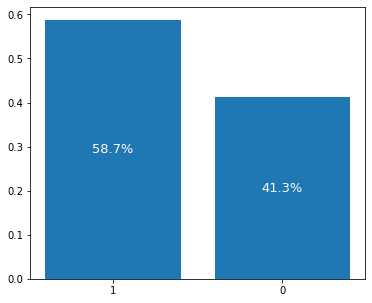

In [17]:
fig, ax = plt.subplots(figsize=(6,5))

v_c = games['HOME_TEAM_WINS'].value_counts(normalize=True)
v_c.index = v_c.index.astype(str)

ax.bar(v_c.index, v_c.values)

for i in ax.patches:
    x, y = i.get_x(), i.get_y()
    w, h = i.get_width(), i.get_height()

    val = str(round(h*100,1)) + '%' 

    ax.text(x + w/2, y + h/2, val,
            horizontalalignment='center', verticalalignment='center',
            fontsize=13, color='white')

plt.show()

A model that only says the winner in the home team will have a 59.1% to identify the winner.

## First preprocessing 

First we only need the 3 following datasets `games`, `games_details` and `ranking`.

Then at the end we'll want to get a row for a game. Since players can change we need to aggregate player stats and teams raking plus record.

So for each game we need to find out past games, and the same for each players

### Format rankings

In [23]:
def format_record(record):
    w = int(record[0])
    l = int(record[1])
    n = w+l
    
    if n == 0:
        return np.NaN
    
    return w / n

def format_rankings(ranking):
    
    home_record = ranking.loc[:,'HOME_RECORD'].str.split('-').apply(format_record)
    road_record = ranking.loc[:,'ROAD_RECORD'].str.split('-').apply(format_record)
    
    ranking.loc[:,'HOME_RECORD'] = home_record
    ranking.loc[:,'ROAD_RECORD'] = road_record
    
    ranking.loc[:,'SEASON_ID'] = ranking.loc[:,'SEASON_ID'].astype(str).str[1:]
    
    return ranking



ranking = pd.read_csv('ranking.csv')
ranking = format_rankings(ranking)

In [24]:
games.sample(5)[['GAME_DATE_EST','TEAM_ID_home','TEAM_ID_away','PTS_home','PTS_away','HOME_TEAM_WINS']]

,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
4814,2013-04-05,1610612762,1610612740,95.0,83.0,1
1050,2021-10-08,1610612743,1610612750,112.0,114.0,0
5941,2012-10-30,1610612739,1610612764,94.0,84.0,1
19951,2018-11-07,1610612754,1610612755,94.0,100.0,0
12889,2007-04-28,1610612753,1610612765,93.0,97.0,0


#### Extract ranking context from team_id and date

In [25]:
ranking = ranking.sort_values(by='STANDINGSDATE')

In [26]:
def get_team_ranking_before_date(team_id, date, min_games=10):
    """Returned a dataframe with the team id, 
    Number of games played, win percentage, home and road record for
    current and previous season.
    
    Current and previous season are based on the date    
    """
    
    _ranking = ranking.loc[ranking['STANDINGSDATE'] < date]
    _ranking = _ranking.loc[_ranking['TEAM_ID'] == team_id]
    
    if _ranking.tail(1)['G'].values[0] < min_games:
        _ranking = _ranking.loc[_ranking['SEASON_ID']  < _ranking['SEASON_ID'].max()]
    
    _prev_season = _ranking.loc[_ranking['SEASON_ID']  < _ranking['SEASON_ID'].max()]
    _prev_season = _prev_season.loc[_prev_season['STANDINGSDATE'] == _prev_season['STANDINGSDATE'].max()]
    
    _current_season = _ranking[_ranking['STANDINGSDATE'] == _ranking['STANDINGSDATE'].max()]
    
    _current_season = _current_season[['TEAM_ID','G','W_PCT','HOME_RECORD','ROAD_RECORD']]
    _prev_season = _prev_season[['TEAM_ID','W_PCT','HOME_RECORD','ROAD_RECORD']]
    
    return _current_season.merge(_prev_season, on='TEAM_ID', suffixes=('','_prev')).drop(columns='TEAM_ID')


def get_team_ranking_before_game(games):
    _games = games.copy()
    
    def _get_ranking(game):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_rank = get_team_ranking_before_date(home_team, date)
        a_rank = get_team_ranking_before_date(away_team, date)
        
        h_rank.columns += '_home'
        a_rank.columns += '_away'
        
        return pd.concat([h_rank, a_rank], axis=1)
    
        
    _games = _games.groupby('GAME_ID').apply(_get_ranking)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)

In [27]:
%%time

_games = games.sample(10)
get_team_ranking_before_game(_games)

CPU times: user 498 ms, sys: 53.5 ms, total: 551 ms
Wall time: 575 ms


,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,HOME_RECORD_away,ROAD_RECORD_away,W_PCT_prev_away,HOME_RECORD_prev_away,ROAD_RECORD_prev_away
0,20400466,30,0.567,0.642857,0.500000,0.659,0.756098,0.560976,33,0.485,0.588235,0.375000,0.610,0.756098,0.463415
1,20400896,60,0.517,0.677419,0.344828,0.439,0.463415,0.414634,59,0.169,0.285714,0.064516,0.341,0.439024,0.243902
2,20600464,31,0.774,0.823529,0.714286,0.732,0.829268,0.634146,32,0.406,0.562500,0.250000,0.427,0.536585,0.317073
3,20900442,29,0.379,0.437500,0.307692,0.390,0.487805,0.292683,27,0.593,0.705882,0.400000,0.659,0.682927,0.634146
4,21400415,25,0.880,0.900000,0.866667,0.622,0.658537,0.585366,27,0.444,0.437500,0.454545,0.341,0.414634,0.268293
5,21400494,32,0.313,0.266667,0.352941,0.329,0.341463,0.317073,31,0.742,0.764706,0.714286,0.610,0.658537,0.560976
6,21800213,13,0.462,0.200000,0.625000,0.793,0.829268,0.756098,15,0.800,0.888889,0.666667,0.707,0.707317,0.707317
7,21801216,80,0.400,0.575000,0.225000,0.293,0.365854,0.219512,81,0.235,0.292683,0.175000,0.256,0.243902,0.268293
8,42000174,72,0.583,0.583333,0.583333,0.573,0.526316,0.621622,72,0.653,0.722222,0.583333,0.681,0.750000,0.611111


### Get game stats

In [28]:
games = games.sort_values(by='GAME_DATE_EST')

In [29]:
def get_games_stats_before_date(team_id, date, n, stats_cols, game_type='all'):
    """
    """
    
    if game_type not in ['all','home','away']:
        raise ValueError('game_type must be all, home or away')
    
    _games = games.loc[games['GAME_DATE_EST'] < date]
    _games = _games.loc[(_games['TEAM_ID_home'] == team_id) | (_games['TEAM_ID_away'] == team_id)]
    
    _games.loc[:,'is_home'] = _games['TEAM_ID_home'] == team_id
    
    if game_type == 'home':
        _games = _games.loc[_games['is_home']]
        
    elif game_type == 'away':
        _games = _games.loc[~_games['is_home']]
        
    _games.loc[:,'WIN_PRCT'] = _games['is_home'] == _games['HOME_TEAM_WINS']
    
    for col in stats_cols:
        _games.loc[:,col] = np.where(_games['is_home'], _games['%s_home'%col], _games['%s_away'%col])
    
    cols = ['WIN_PRCT'] + stats_cols
    
    if len(_games) < n:
        return _games[cols]
    
    return _games.tail(n)[cols]



STATS_COLUMNS = ['PTS','FG_PCT','FT_PCT','FG3_PCT','AST','REB']
# STATS_COLUMNS = ['PTS']

def get_games_stats_before_game(games, n, stats_cols=STATS_COLUMNS):
    _games = games.copy()
    
    def _get_stats(game):
        date = game['GAME_DATE_EST'].values[0]
        home_team = game['TEAM_ID_home'].values[0]
        away_team = game['TEAM_ID_away'].values[0]
        
        h_stats = get_games_stats_before_date(home_team, date, n, stats_cols, game_type='all')
        h_stats.columns += '_home_%ig'%n
        h_stats = h_stats.mean().to_frame().T
        
        a_stats = get_games_stats_before_date(away_team, date, n, stats_cols, game_type='all')
        a_stats.columns += '_away_%ig'%n
        a_stats = a_stats.mean().to_frame().T
        
        return pd.concat([h_stats, a_stats], axis=1)
        
        
    _games = _games.groupby('GAME_ID').apply(_get_stats)
    _games = _games.reset_index().drop(columns='level_1')
    
    return _games.reset_index(drop=True)

In [30]:
%%time

_games = games.sample(10, random_state=42)
get_games_stats_before_game(_games, n=2)

CPU times: user 212 ms, sys: 6.75 ms, total: 219 ms
Wall time: 236 ms


,GAME_ID,WIN_PRCT_home_2g,PTS_home_2g,FG_PCT_home_2g,FT_PCT_home_2g,FG3_PCT_home_2g,AST_home_2g,REB_home_2g,WIN_PRCT_away_2g,PTS_away_2g,FG_PCT_away_2g,FT_PCT_away_2g,FG3_PCT_away_2g,AST_away_2g,REB_away_2g
0,20301077,0.0,93.5,0.3855,0.6615,0.1665,13.5,48.5,0.0,92.0,0.4155,0.7815,0.3615,24.0,45.0
1,20500691,1.0,89.5,0.4115,0.8435,0.2970,16.0,43.0,0.5,94.0,0.4425,0.6755,0.3165,15.0,42.0
2,20701230,0.5,119.0,0.4575,0.7470,0.3975,22.5,43.5,0.5,86.5,0.3975,0.7185,0.2500,16.5,46.0
3,20800732,1.0,104.5,0.5105,0.8375,0.3205,25.0,41.0,1.0,120.5,0.5150,0.8220,0.4250,25.0,48.5
4,20801055,0.5,105.0,0.4765,0.8660,0.3250,19.5,45.0,0.5,102.0,0.5030,0.8015,0.3335,22.5,36.5
5,20900020,0.0,97.0,0.4500,0.6130,0.3945,21.0,38.5,0.0,90.0,0.4145,0.7095,0.3465,21.0,39.0
6,21700150,0.0,105.5,0.4660,0.7570,0.3830,24.5,37.0,1.0,97.5,0.4030,0.7710,0.2655,23.0,52.5
7,21901293,0.0,121.5,0.4330,0.7595,0.4160,29.5,50.0,0.5,123.5,0.4325,0.8410,0.3375,30.5,45.5
8,22000124,1.0,116.5,0.4560,0.8850,0.4300,20.5,54.5,0.5,129.5,0.4565,0.7390,0.3980,27.0,42.0
9,40900206,1.0,108.5,0.4985,0.7030,0.3020,22.0,44.0,0.0,87.5,0.4075,0.7690,0.2615,19.5,32.0


#### Check function validity

In [31]:
one_game = games.sample(1, random_state=42)
one_game[['GAME_ID','GAME_DATE_EST','TEAM_ID_home','TEAM_ID_away','PTS_home','PTS_away','HOME_TEAM_WINS']]

,GAME_ID,GAME_DATE_EST,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
9858,20900020,2009-10-30,1610612755,1610612749,99.0,86.0,1


- **GAME_ID** selected : 21201104
- **TEAM_ID_home** : 1610612750
- **TEAM_ID_away** : 1610612738

In [32]:
date = '2013-04-01'
game_id = 21201104
h_team = 1610612745
a_team = 1610612753

In [33]:
_games = games[games['GAME_DATE_EST'] < date].sort_values(by='GAME_DATE_EST')
    
for team_id in [h_team, a_team]:
    print(team_id)
    _games2 = _games.loc[(_games['TEAM_ID_home'] == team_id) | (_games['TEAM_ID_away'] == team_id)]

    # Check on PTS and AST
    _games2 = _games2[['GAME_DATE_EST','TEAM_ID_home','PTS_home','REB_home','TEAM_ID_away','PTS_away','REB_away']]

    # define n = 5
    display(_games2.tail(5))

1610612745


,GAME_DATE_EST,TEAM_ID_home,PTS_home,REB_home,TEAM_ID_away,PTS_away,REB_away
4918,2013-03-22,1610612745,116.0,54.0,1610612739,78.0,32.0
4899,2013-03-24,1610612745,96.0,44.0,1610612759,95.0,38.0
4881,2013-03-27,1610612745,91.0,42.0,1610612754,100.0,45.0
4865,2013-03-29,1610612763,103.0,42.0,1610612745,94.0,35.0
4853,2013-03-30,1610612745,98.0,48.0,1610612746,81.0,38.0


1610612753


,GAME_DATE_EST,TEAM_ID_home,PTS_home,REB_home,TEAM_ID_away,PTS_away,REB_away
4913,2013-03-22,1610612753,89.0,44.0,1610612760,97.0,49.0
4892,2013-03-25,1610612753,94.0,43.0,1610612748,108.0,44.0
4876,2013-03-27,1610612766,114.0,43.0,1610612753,108.0,34.0
4860,2013-03-29,1610612753,97.0,41.0,1610612764,92.0,55.0
4851,2013-03-30,1610612737,97.0,44.0,1610612753,88.0,53.0


In [34]:
res = get_games_stats_before_game(one_game, n=5, stats_cols=['PTS','REB'])
res

,GAME_ID,WIN_PRCT_home_5g,PTS_home_5g,REB_home_5g,WIN_PRCT_away_5g,PTS_away_5g,REB_away_5g
0,20900020,0.2,102.4,45.4,0.4,92.6,42.8


In [35]:
h_pts = 116 + 96 + 91 + 94 + 98
a_pts = 89 + 94 + 108 + 97 + 88

h_reb = 54 + 44 + 42 + 35 + 48
a_reb = 44 + 43 + 34 + 41 + 53

h_pts = h_pts / 5
h_reb = h_reb / 5

a_pts = a_pts / 5
a_reb = a_reb / 5

print(h_pts, h_reb, a_pts, a_reb)

assert h_pts == res['PTS_home_5g'].values[0]
assert h_reb == res['REB_home_5g'].values[0]
assert a_pts == res['PTS_away_5g'].values[0]
assert a_reb == res['REB_away_5g'].values[0]
print('Function ok!')

99.0 44.6 95.2 43.0


AssertionError: 

### Combine team ranking stats and game stats

In [36]:
%%time 

def prepare_games_data(games):
    # Get ranking stats before game
    rank_stats = get_team_ranking_before_game(games)
    
    # Get stats before game 3 previous games
    game_stats_3g = get_games_stats_before_game(games, n=3)
    
    # Get stats before game 10 previous games
    game_stats_5g = get_games_stats_before_game(games, n=5)
    
    formated_games = rank_stats.merge(game_stats_3g, on='GAME_ID')
    formated_games = formated_games.merge(game_stats_5g, on='GAME_ID')
    
    return formated_games
    
    
_games = games.sample(10, random_state=42)
prepare_games_data(_games)

CPU times: user 828 ms, sys: 42.7 ms, total: 871 ms
Wall time: 915 ms


,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,FG3_PCT_home_5g,AST_home_5g,REB_home_5g,WIN_PRCT_away_5g,PTS_away_5g,FG_PCT_away_5g,FT_PCT_away_5g,FG3_PCT_away_5g,AST_away_5g,REB_away_5g
0,20301077,74,0.311,0.432432,0.189189,0.451,0.560976,0.341463,73,0.575,...,0.2586,14.2,46.2,0.2,91.8,0.4430,0.7738,0.3576,26.6,41.4
1,20500691,46,0.783,0.809524,0.760000,0.707,0.707317,0.707317,46,0.413,...,0.3734,17.8,42.6,0.4,101.8,0.4716,0.7528,0.3680,18.2,40.2
2,20701230,81,0.593,0.675000,0.512195,0.512,0.731707,0.292683,81,0.235,...,0.3074,23.6,46.0,0.4,97.4,0.4132,0.7770,0.2514,20.6,44.4
3,20800732,50,0.820,0.923077,0.708333,0.805,0.853659,0.756098,48,0.813,...,0.4652,27.8,40.6,0.8,119.6,0.5012,0.7984,0.3576,22.0,46.0
4,20801055,71,0.465,0.636364,0.315789,0.402,0.487805,0.317073,69,0.493,...,0.3450,20.2,42.0,0.2,98.0,0.4566,0.7652,0.4334,22.2,41.0
5,20900020,82,0.500,0.585366,0.414634,0.488,0.536585,0.439024,82,0.415,...,0.3758,20.0,45.4,0.4,92.6,0.4228,0.6726,0.3570,22.2,42.8
6,21700150,10,0.500,0.750000,0.333333,0.512,0.707317,0.317073,10,0.500,...,0.4500,26.0,42.8,0.6,103.0,0.4420,0.7854,0.2866,27.2,46.6
7,21901293,70,0.614,0.666667,0.567568,0.610,0.707317,0.512195,72,0.583,...,0.3538,25.2,44.6,0.4,125.0,0.4234,0.8182,0.3036,27.0,51.2
8,22000124,72,0.667,0.722222,0.611111,0.598,0.682927,0.512195,72,0.347,...,0.3662,23.2,47.8,0.4,125.2,0.4808,0.7810,0.4068,28.2,42.2
9,40900206,82,0.610,0.585366,0.634146,0.756,0.853659,0.658537,82,0.744,...,0.3126,22.8,40.4,0.4,97.2,0.4594,0.7622,0.2926,19.8,36.4


## Format full dataset (min season 2007) 

In [41]:
_games = games[games['SEASON'] >= 2017]

In [42]:
_games['SEASON'].unique()

array([2017, 2018, 2019, 2020, 2021])

In [43]:
%%time
games_formated = prepare_games_data(_games)

CPU times: user 9min 16s, sys: 23.5 s, total: 9min 39s
Wall time: 9min 43s


In [46]:
games_formated = games_formated.merge(games[['GAME_ID','GAME_DATE_EST','SEASON','HOME_TEAM_WINS']], on='GAME_ID', how='left')
games_formated = games_formated.reset_index(drop=True)

In [47]:
# games_formated = games_formated.drop(columns=['GAME_DATE_EST_y','GAME_DATE_EST_x'])

In [48]:
games_formated.head()

,GAME_ID,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,...,FT_PCT_away_5g,FG3_PCT_away_5g,AST_away_5g,REB_away_5g,GAME_DATE_EST_x,SEASON_x,HOME_TEAM_WINS_x,GAME_DATE_EST_y,SEASON_y,HOME_TEAM_WINS_y
0,11700001,82,0.817,0.878049,0.756098,0.890,0.951220,0.829268,82,0.488,...,0.7882,0.3246,26.4,47.8,2017-09-30,2017,0,2017-09-30,2017,0
1,11700002,82,0.317,0.414634,0.219512,0.207,0.292683,0.121951,82,0.378,...,0.8304,0.3176,25.2,41.2,2017-09-30,2017,0,2017-09-30,2017,0
2,11700003,82,0.622,0.682927,0.560976,0.683,0.780488,0.585366,82,0.622,...,0.6746,0.3632,16.6,37.0,2017-10-01,2017,1,2017-10-01,2017,1
3,11700004,82,0.500,0.560976,0.439024,0.585,0.682927,0.487805,82,0.524,...,0.7462,0.3036,23.2,43.6,2017-10-01,2017,1,2017-10-01,2017,1
4,11700006,82,0.524,0.585366,0.463415,0.512,0.634146,0.390244,82,0.354,...,0.8452,0.3730,24.2,42.4,2017-10-02,2017,1,2017-10-02,2017,1


In [49]:
games_formated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GAME_ID                6384 non-null   int64  
 1   G_home                 6384 non-null   int64  
 2   W_PCT_home             6384 non-null   float64
 3   HOME_RECORD_home       6384 non-null   float64
 4   ROAD_RECORD_home       6384 non-null   float64
 5   W_PCT_prev_home        6384 non-null   float64
 6   HOME_RECORD_prev_home  6384 non-null   float64
 7   ROAD_RECORD_prev_home  6384 non-null   float64
 8   G_away                 6384 non-null   int64  
 9   W_PCT_away             6384 non-null   float64
 10  HOME_RECORD_away       6384 non-null   float64
 11  ROAD_RECORD_away       6384 non-null   float64
 12  W_PCT_prev_away        6384 non-null   float64
 13  HOME_RECORD_prev_away  6384 non-null   float64
 14  ROAD_RECORD_prev_away  6384 non-null   float64
 15  WIN_

In [50]:
games_formated.isna().sum().sum()

0

In [52]:
games_formated.to_csv('games17.csv', index=False)

## Define feature / target

In [127]:
feat_cols = [
    'G_home', 'W_PCT_home', 'HOME_RECORD_home',
    'ROAD_RECORD_home', 'W_PCT_prev_home', 'HOME_RECORD_prev_home',
    'ROAD_RECORD_prev_home', 'G_away', 'W_PCT_away', 'HOME_RECORD_away',
    'ROAD_RECORD_away', 'W_PCT_prev_away', 'HOME_RECORD_prev_away',
    'ROAD_RECORD_prev_away', 'WIN_PRCT_home_3g', 'PTS_home_3g',
    'FG_PCT_home_3g', 'FT_PCT_home_3g', 'FG3_PCT_home_3g', 'AST_home_3g',
    'REB_home_3g', 'WIN_PRCT_away_3g', 'PTS_away_3g', 'FG_PCT_away_3g',
    'FT_PCT_away_3g', 'FG3_PCT_away_3g', 'AST_away_3g', 'REB_away_3g',
    'WIN_PRCT_home_5g', 'PTS_home_5g', 'FG_PCT_home_5g',
    'FT_PCT_home_5g', 'FG3_PCT_home_5g', 'AST_home_5g', 'REB_home_5g',
    'WIN_PRCT_away_5g', 'PTS_away_5g', 'FG_PCT_away_5g',
    'FT_PCT_away_5g', 'FG3_PCT_away_5g', 'AST_away_5g', 'REB_away_5g'
]
target = 'HOME_TEAM_WINS_y'

In [128]:
corr = games_formated[feat_cols + [target]].corr()

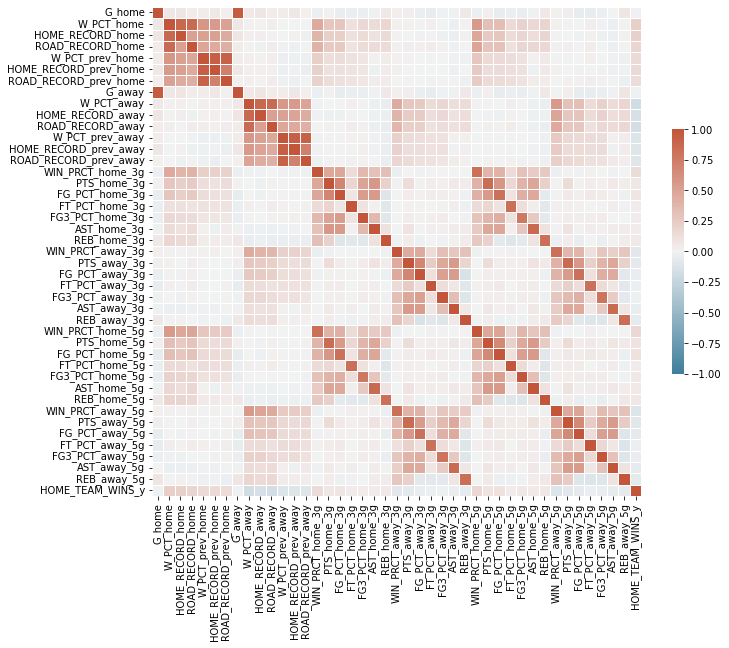

In [61]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0, vmin=-1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [159]:
feat_cols = corr[corr[target].sort_values().abs() >= 0.1].index
feat_cols = [c for c in feat_cols if c != target]
feat_cols

/var/folders/jr/nyzbrh356454jscw4612xywr0000gn/T/ipykernel_14106/486108706.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feat_cols = corr[corr[target].sort_values().abs() >= 0.1].index


['W_PCT_home',
 'HOME_RECORD_home',
 'ROAD_RECORD_home',
 'W_PCT_prev_home',
 'HOME_RECORD_prev_home',
 'ROAD_RECORD_prev_home',
 'W_PCT_away',
 'HOME_RECORD_away',
 'ROAD_RECORD_away',
 'W_PCT_prev_away',
 'HOME_RECORD_prev_away',
 'ROAD_RECORD_prev_away',
 'WIN_PRCT_home_3g',
 'WIN_PRCT_home_5g',
 'FG_PCT_home_5g',
 'WIN_PRCT_away_5g']

## Training set : 20016-20 seasons data

In [160]:
train = games_formated.loc[(games_formated['SEASON_y'] >= 2016) & (games_formated['SEASON_y'] <= 2020)]

In [161]:
train.shape

(5308, 49)

In [162]:
train['HOME_TEAM_WINS_y'].value_counts(normalize=True)

1    0.564431
0    0.435569
Name: HOME_TEAM_WINS_y, dtype: float64

In [163]:
X_train, y_train = train[feat_cols], train[target]

## Test set : 2021 season 

In [164]:
test = games_formated.loc[(games_formated['SEASON_y'] == 2021)]

In [165]:
test.shape

(1076, 49)

In [166]:
test['HOME_TEAM_WINS_y'].value_counts(normalize=True)

1    0.554833
0    0.445167
Name: HOME_TEAM_WINS_y, dtype: float64

In [167]:
X_test, y_test = test[feat_cols], test[target]

## Train a first model

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [169]:
dummy = DummyClassifier()
scoring = [
    "accuracy"
] 

scores = cross_validate(dummy, X_train, y_train, cv=5, return_train_score=True, scoring = scoring)
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy
0,0.001308,0.000383,0.564030,0.564531
1,0.001544,0.000320,0.564030,0.564531
2,0.000809,0.000293,0.564972,0.564296
3,0.000965,0.000313,0.564562,0.564398
4,0.000937,0.000347,0.564562,0.564398


In [170]:
#reference: lecture 3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, **kwargs)
    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []
    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
    return pd.Series(data=out_col, index=mean_scores.index)

In [171]:
preprocessor=make_column_transformer(
    (StandardScaler(), feat_cols))
pipelr = make_pipeline(preprocessor,  LogisticRegression(max_iter=1000))

In [172]:
results ={}
results["lr"] = mean_std_cross_val_scores(
    LogisticRegression(max_iter=1000), X_train, y_train, return_train_score=True, scoring="accuracy"
)
results["lr_pre"] = mean_std_cross_val_scores(
    pipelr, X_train, y_train, return_train_score=True, scoring="accuracy"
)

In [173]:
results

{'lr': fit_time       0.036 (+/- 0.007)
 score_time     0.002 (+/- 0.000)
 test_score     0.637 (+/- 0.029)
 train_score    0.639 (+/- 0.008)
 dtype: object,
 'lr_pre': fit_time       0.025 (+/- 0.008)
 score_time     0.002 (+/- 0.000)
 test_score     0.636 (+/- 0.031)
 train_score    0.641 (+/- 0.009)
 dtype: object}

In [174]:
#kNN:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())
results["kNN"] = mean_std_cross_val_scores(
    pipe_knn, X_train, y_train, return_train_score=True, scoring=["accuracy", "recall", "precision"]
)

In [175]:

# lgbm
pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier(random_state=123))
results["lgbm"] = mean_std_cross_val_scores(
    pipe_lgbm, X_train, y_train, return_train_score=True, scoring=["accuracy", "recall", "precision"]
)

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=7, bootstrap=True)
pipe_rf = make_pipeline(preprocessor,rf)
results["rf"] = mean_std_cross_val_scores(
     pipe_rf, X_train, y_train, return_train_score=True, scoring=["accuracy", "recall", "precision"]
)



Traceback (most recent call last):
  File "/opt/miniconda3/envs/cpsc330/lib/python3.9/runpy.py", line 188, in _run_module_as_main
Traceback (most recent call last):
  File "/opt/miniconda3/envs/cpsc330/lib/python3.9/runpy.py", line 188, in _run_module_as_main
Traceback (most recent call last):
  File "/opt/miniconda3/envs/cpsc330/lib/python3.9/runpy.py", line 188, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/opt/miniconda3/envs/cpsc330/lib/python3.9/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/joblib/__init__.py", line 120, in <module>
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/opt/miniconda3/envs/cpsc330/lib/python3.9/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/joblib/__init__.py", line 120, in <module>
    mod_name, mo

KeyboardInterrupt: 

In [106]:
results

{'lr': fit_time       0.037 (+/- 0.006)
 score_time     0.002 (+/- 0.000)
 test_score     0.637 (+/- 0.029)
 train_score    0.639 (+/- 0.008)
 dtype: object,
 'lr_pre': fit_time       0.034 (+/- 0.019)
 score_time     0.002 (+/- 0.000)
 test_score     0.636 (+/- 0.031)
 train_score    0.641 (+/- 0.009)
 dtype: object,
 'kNN': fit_time           0.006 (+/- 0.001)
 score_time         0.163 (+/- 0.017)
 test_accuracy      0.588 (+/- 0.025)
 train_accuracy     0.739 (+/- 0.004)
 test_recall        0.651 (+/- 0.023)
 train_recall       0.782 (+/- 0.003)
 test_precision     0.631 (+/- 0.023)
 train_precision    0.762 (+/- 0.005)
 dtype: object,
 'lgbm': fit_time           0.248 (+/- 0.075)
 score_time         0.009 (+/- 0.002)
 test_accuracy      0.602 (+/- 0.022)
 train_accuracy     0.890 (+/- 0.003)
 test_recall        0.695 (+/- 0.038)
 train_recall       0.939 (+/- 0.003)
 test_precision     0.635 (+/- 0.019)
 train_precision    0.876 (+/- 0.005)
 dtype: object,
 'rf': fit_time          

In [108]:
rf.fit(X_train, y_train)
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

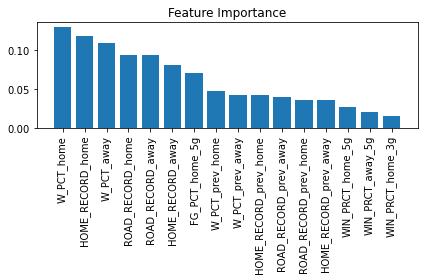

In [109]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

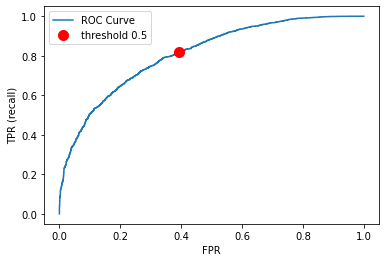

In [111]:
from sklearn.metrics import roc_curve
pipe_rf.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_train, pipe_rf.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

In [183]:
pr_dict = {"threshold": [], "precision": [], "recall": [], "f1 score": []}
for threshold in thresholds:
    preds = pipe_rf.predict_proba(X_train)[:, 1] > threshold
    pr_dict["threshold"].append(threshold)
    pr_dict["precision"].append(precision_score(y_train, preds))
    pr_dict["recall"].append(recall_score(y_train, preds))
    pr_dict["f1 score"].append(f1_score(y_train, preds))

/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [119]:
param_grid = {'randomforestclassifier__bootstrap': [True, False], 
     'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
      'randomforestclassifier__max_features': ['auto', 'sqrt'],
      'randomforestclassifier__min_samples_leaf': [1, 2, 4],
      'randomforestclassifier__min_samples_split': [2, 5, 10],
      'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rand_search = RandomizedSearchCV(
    pipe_rf,param_grid, n_jobs=-1, n_iter = 20,cv=5, scoring="accuracy"
)
rand_search.fit(X_train, y_train);

In [120]:
rand_search.best_params_

{'randomforestclassifier__n_estimators': 800,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__bootstrap': True}

In [121]:
rand_search.best_score_

0.6313049019242409

## Test

In [179]:
clf = RandomForestClassifier(random_state=42,  n_estimators=800, max_depth=10, max_features="auto", bootstrap=True)
clf.fit(X_train, y_train)

pipe_rf = make_pipeline(preprocessor,clf)
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['W_PCT_home',
                                                   'HOME_RECORD_home',
                                                   'ROAD_RECORD_home',
                                                   'W_PCT_prev_home',
                                                   'HOME_RECORD_prev_home',
                                                   'ROAD_RECORD_prev_home',
                                                   'W_PCT_away',
                                                   'HOME_RECORD_away',
                                                   'ROAD_RECORD_away',
                                                   'W_PCT_prev_away',
                                                   'HOME_RECORD_prev_away',
                                            

In [180]:
print('Train accuracy:',pipe_rf.score(X_train, y_train))
print('Test accuracy:', pipe_rf.score(X_test, y_test))

Train accuracy: 0.8566314996232103
Test accuracy: 0.6189591078066915


In [ ]:
lr = LogisticRegression(random_state=42, penalty='l2', max_iter = 5000)
pipe_lr = make_pipeline(preprocessor,lr)
pipe_lr.fit(X_train,y_train)

In [ ]:
print('Train accuracy:',pipe_lr.score(X_train, y_train))
print('Test accuracy:', pipe_lr.score(X_test, y_test))

### Bayesian opitmisation

In [ ]:
# help function : http://hyperopt.github.io/hyperopt/getting-started/search_spaces/
param_hyperopt = {
    'bootstrap': hp.choice('bootstrap', [True, False]),
    'max_depth': scope.int(hp.quniform('max_depth', 2, 10, 1)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt']),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 4, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 10, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 2000, 1))
}

n_iter =  50
clf = RandomForestClassifier


NameError: name 'hp' is not defined

In [ ]:
bayes_search.best_estimator_.score(X_test, y_test)

In [518]:
# help function : http://hyperopt.github.io/hyperopt/getting-started/search_spaces/
param_hyperopt = {
    'C': scope.int(hp.quniform('C', 1, 10, 1)),
    'penalty': hp.choice('penalty', ['l1','l2','elasticnet']),
    'solver' :hp.choice('solver', ['newton-cg','lbfgs','liblinear','sag','saga']),
}

n_iter =  50
lr = LogisticRegression

bayes_search = BayesianSearchCV(lr, param_hyperopt, n_iter, cv=5, scoring='accuracy', maximize_score=True, n_jobs=2)
bayes_search.fit(X_train, y_train)

bayes_search.best_estimator_

100%|██████████| 50/50 [00:48<00:00,  1.04trial/s, best loss: -0.6681097874295496]


LogisticRegression(C=8, n_jobs=2, penalty='l1', solver='liblinear')

0.6398066075745367


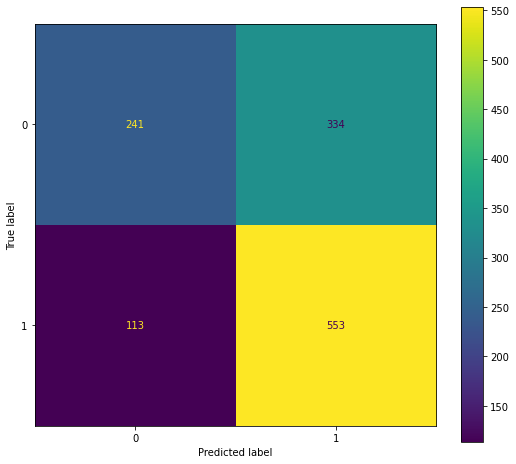

In [522]:
from sklearn.metrics import plot_confusion_matrix

print(bayes_search.best_estimator_.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(9,8))
plot_confusion_matrix(bayes_search.best_estimator_, X_test, y_test, ax=ax)  
plt.show()